# Segmentazione della clientela di un'azienda di prodotti finanziari

Lo scopo del seguente notebook è presentare la segmentazione della clientela svolta per un'azienda di prodotti finanziari. Dall'azienda è stato fornito un file CSV contenente i dati di tutti i clienti, con l'obiettivo di pianificare una futura campagna di marketing per una nuova linea di carte di credito.

La prima sezione del notebook sarà dedicata all'importazione dei dati e a una loro prima esplorazione allo scopo di individuare e gestire errori e valori mancanti. Dopo l'analisi esplorativa e la preparazione dei dati, sarà addestrato un modello di clustering. Il notebook si concluderà con una valutazione dei risultati ottenuti dal modello.

## Importazione e prima esplorazione dei dati

Il primo passo è stato scaricare il file CSV [a questo link](https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv) fornito dall'azienda e contenente i dati della clientela da segmentare.

In [1]:
!curl https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv --output credit_card_customers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  881k  100  881k    0     0   958k      0 --:--:-- --:--:-- --:--:--  958k


Il file è stato importato in un DataFrame tramite la libreria Pandas e sono state visualizzate le prime e le ultime cinque righe della tabella.

In [2]:
import pandas as pd

df=pd.read_csv("credit_card_customers.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


La tabella è costituita da 8.950 righe e da 18 colonne, la prima delle quali è una stringa che rappresenta il codice identificativo del cliente. Per le future analisi, questa colonna è stata separata dal resto della tabella.

In [3]:
customers_col=df["CUST_ID"]
df=df.drop("CUST_ID",axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Infine, la tabella sottostante sintetizza i valori del dataset riportando il conteggio, la media, la deviazione standard e la divisione in quartili.

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Dalla sintesi del dataset osserviamo quanto segue:
- Le colonne *CREDIT_LIMIT* e *MINIMUM_PAYMENTS* presentano dei valori mancanti;
- La media e la deviazione standard di tutte le colonne hanno diversi ordini di grandezza che possono inficiare la performance del modello;
- A differenza delle altre colonne che rappresentano una frequenza e che hanno valori compresi tra 0 e 1, la colonna *CASH_ADVANCE_FREQUENCY* ha un valore massimo pari a 1.5.

Il primo e il terzo punto saranno al centro della prossima sezione, dedicata alla gestione dei valori mancanti e degli errori, mentre il secondo punto sarà gestito nella sezione dedicata alla standardizzazione dei dati.

## Gestione dei valori mancanti e degli errori

Innanzitutto, contiamo i valori mancanti per ciascuna colonna.

In [5]:
df.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


I valori mancanti sono presenti nelle colonne *CREDIT_LIMIT* e *MINIMUM_PAYMENTS*. In entrambi i casi, si è deciso di sostituire le celle vuote con la media dei valori già presenti.

In [6]:
df[["CREDIT_LIMIT","MINIMUM_PAYMENTS"]]=df[["CREDIT_LIMIT","MINIMUM_PAYMENTS"]].fillna(df[["CREDIT_LIMIT","MINIMUM_PAYMENTS"]].mean())

Per quanto riguarda l'errore presente nella colonna *CASH_ADVANCE_FREQUENCY*, si è deciso di riscalare tutti i valori della colonna tramite scalatura Min-Max.

In [7]:
df["CASH_ADVANCE_FREQUENCY"]=(df["CASH_ADVANCE_FREQUENCY"]-df["CASH_ADVANCE_FREQUENCY"].min())/(df["CASH_ADVANCE_FREQUENCY"].max()-df["CASH_ADVANCE_FREQUENCY"].min())

Di seguito possiamo vedere la tabella completa di tutti i dati.

In [8]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.166667,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.055555,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.111111,2,0,500.0,52.549959,55.755628,0.250000,6


## Analisi esplorativa

Questa sezione, dedicata all'analisi esplorativa dei dati, si divide in due parti. Nella prima parte sarà svolta un'analisi univariata in cui ci si concentra sulla media, sulla deviazione standard e sulla simmetria dei dati. Nella seconda parte sarà esplorata la correlazione tra le variabili coinvolte.

### Analisi esplorativa univariata

Prima di procedere con l'analisi, è stata definita la funzione **plot_histogram**, che a partire da una colonna calcola la sua media, la sua deviazione standard e la sua skewness prima di tracciare un istogramma dei valori in ingresso.

Come supporto alla funzione, è stato definito il dizionario *df_skew_result*, che raccoglie i risultati che sintetizzano l'analisi in questa sezione.

In [9]:
import matplotlib.pyplot as plt
import math

df_skew_result={
    "column":[],
    "mean":[],
    "std":[],
    "skew":[]
}

def plot_histogram(column,to_plot=True):
  mean=column.mean()
  std=column.std()
  skew=column.skew()

  if to_plot:
    dim_bin=int(math.log10(column.max()-column.min())-1)
    n_bins=int((column.max()-column.min())/math.pow(10,dim_bin))

    plt.title(f"{column.name}\nMean:{mean:.2f}\nStd:{std:.2f}\nSkew:{skew:.2f}")
    plt.hist(column,bins=n_bins)
    plt.show()

  if not to_plot:
    df_skew_result["column"].append(column.name)
    df_skew_result["mean"].append(mean)
    df_skew_result["std"].append(std)
    df_skew_result["skew"].append(skew)

La funzione è stata poi applicata a tutte le colonne del dataset, senza però tracciare gli istogrammi.

In [10]:
for column in df.columns:
  plot_histogram(df[column],to_plot=False)

I valori memorizzati in *df_skew_result* sono stati visualizzati in un DataFrame e ordinati in base al valore della skewness.

In [11]:
pd.DataFrame(df_skew_result).sort_values("skew",ascending=False)

,column,mean,std,skew
14,MINIMUM_PAYMENTS,864.206542,2330.588021,13.867357
3,ONEOFF_PURCHASES,592.437371,1659.887917,10.045083
2,PURCHASES,1003.204834,2136.634782,8.144269
4,INSTALLMENTS_PURCHASES,411.067645,904.338115,7.299120
13,PAYMENTS,1733.143852,2895.063757,5.907620
10,CASH_ADVANCE_TRX,3.248827,6.824647,5.721298
5,CASH_ADVANCE,978.871112,2097.163877,5.166609
11,PURCHASES_TRX,14.709832,24.857649,4.630655
0,BALANCE,1564.474828,2081.531879,2.393386
15,PRC_FULL_PAYMENT,0.153715,0.292499,1.942820


Oltre ai diversi ordini di grandezza di media e deviazione standard, già evidenziati nelle precedenti sezioni, si osserva una forte asimmetria positiva in alcune delle colonne.

Per meglio visualizzare questa asimmetria, sono stati tracciati i grafici delle cinque colonne più fortemente asimmetriche.

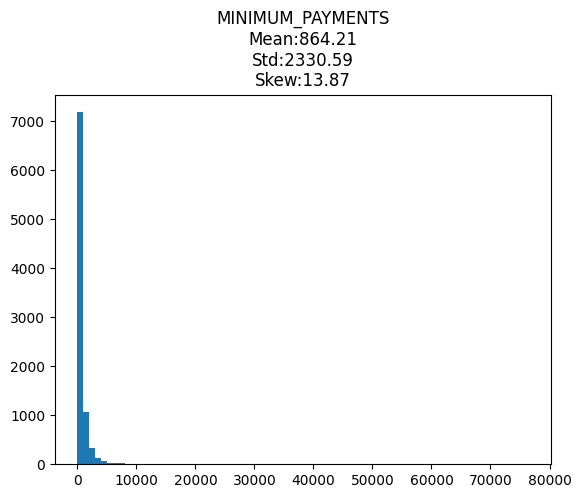

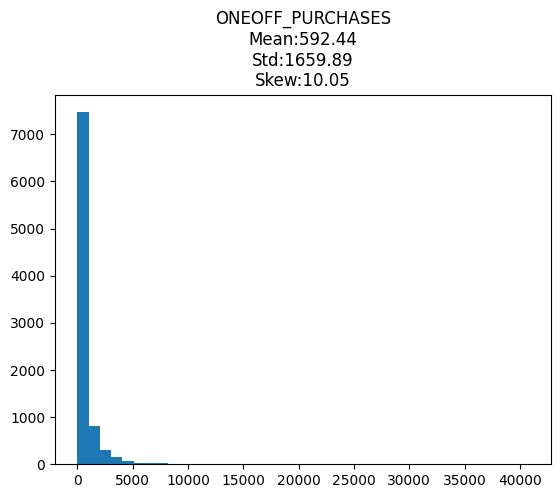

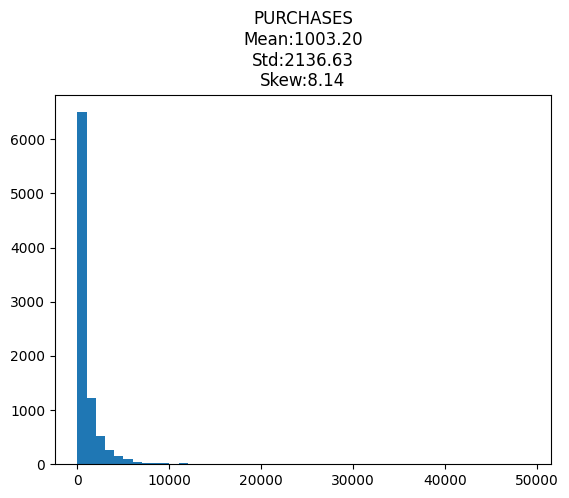

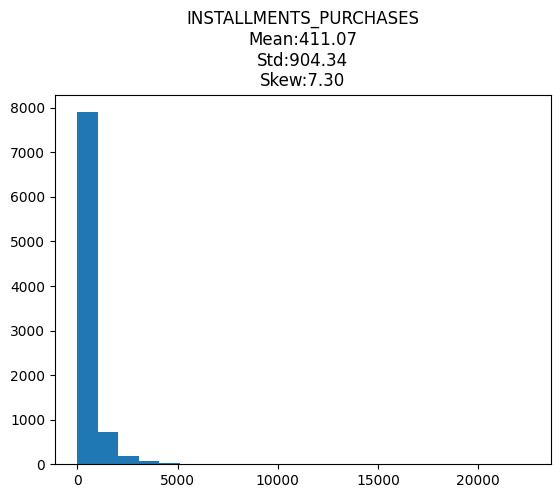

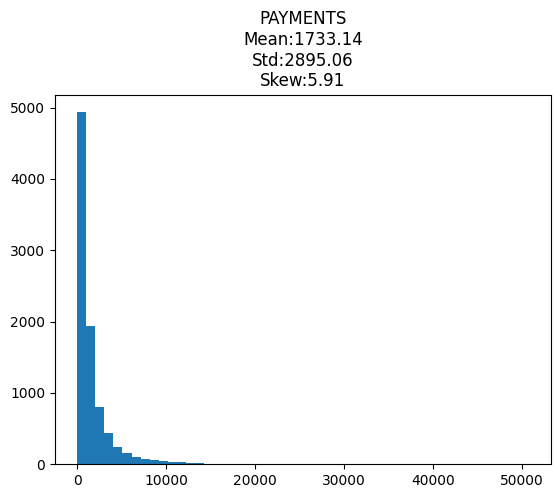

In [12]:
for column in ["MINIMUM_PAYMENTS","ONEOFF_PURCHASES","PURCHASES","INSTALLMENTS_PURCHASES","PAYMENTS"]:
  plot_histogram(df[column])

Da questa analisi emerge quindi la necessità di standardizzare i dati e di simmetrizzarli in modo da ottenere un modello quanto più performante possibile. La standardizzazione e la simmetrizzazione saranno affrontate nella prossima sezione.

### Analisi esplorativa bivariata

Per quanto riguarda la possibile correlazione tra i dati, anche a causa del numero elevato di colonne nella tabella, si è deciso di utilizzare una mappa termica che mostri i valori assoluti degli indici di correlazione tra le variabili.

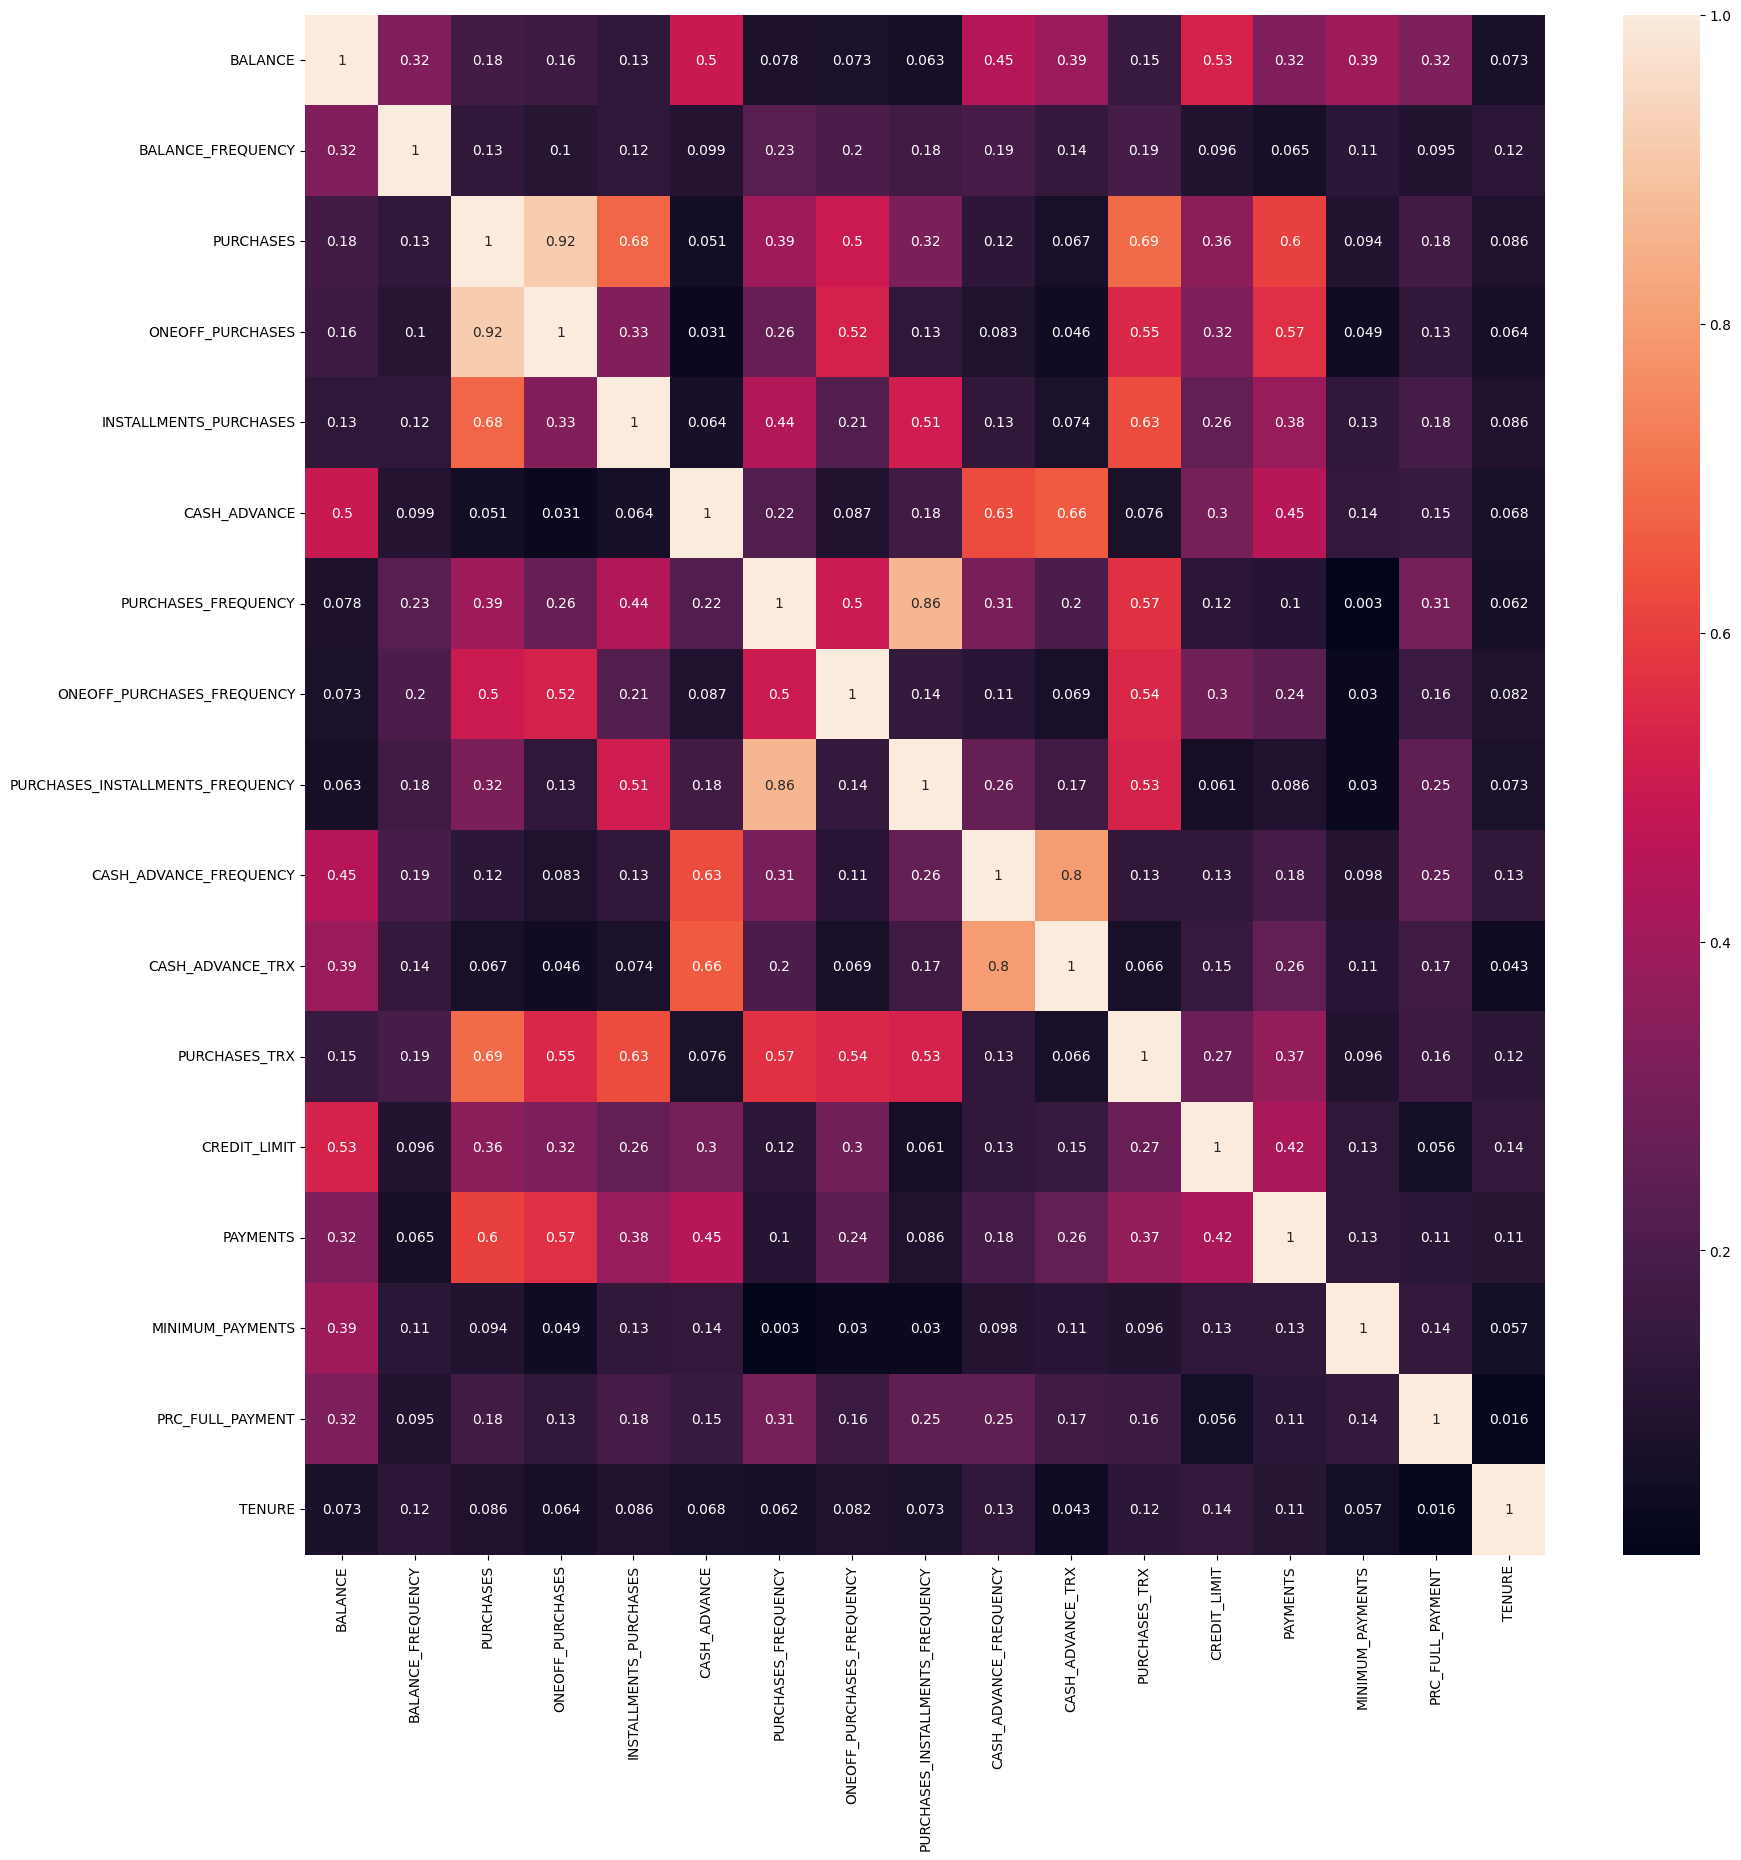

In [13]:
import seaborn as sn
import numpy as np

plt.figure(figsize=(20,20))
sn.heatmap(np.abs(df.corr()),annot=True)
plt.show()

Dalla presenza di colori freddi nella mappa possiamo osservare che, tranne in pochi casi, le variabili sono fortemente scorrelate tra loro, il che sarà di beneficio al modello che costruiremo nelle prossime sezioni. Data questa scarsa correlazione, si è deciso quindi di mantenere tutte le colonne del dataset.

## Standardizzazione e simmetrizzazione dei dati

Come anticipato nella precedente sezione, il primo passo è stato standardizzare i dati, in modo che abbiano la stessa media e la stessa deviazione standard. I dati standardizzati sono stati salvati in un DataFrame a parte chiamato *df_scaled*.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,4.878305e-17,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


In modo analogo, si è deciso di procedere per la simmetrizzazione dei dati. Tramite il Power Transformer nella libreria Scikit-Learn, i dati sono stati simmetrizzati e salvati nel DataFrame *df_power*

In [15]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()
df_power=pd.DataFrame(pt.fit_transform(df_scaled),columns=df_scaled.columns)
df_power

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.154687,-1.293471,-0.839749,-0.808051,-0.371188,-0.785146,-0.797578,-0.904529,-0.646348,-0.888250,-0.839738,-0.815943,-1.340377,-1.161979,-0.953297,-0.682139,0.424218
1,1.235908,-0.726188,-1.094286,-0.808051,-0.906586,1.878934,-1.239107,-0.904529,-0.989950,1.114938,0.989721,-1.160206,0.982988,1.528851,1.084273,1.270786,0.424218
2,1.010078,0.647112,0.459954,1.171735,-0.906586,-0.785146,1.253254,1.747130,-0.989950,-0.888250,-0.839738,0.420257,1.072991,-0.483118,0.417317,-0.682139,0.424218
3,0.608661,-1.660308,1.130032,1.646815,-0.906586,-0.291464,-1.017354,-0.097233,-0.989950,0.163173,-0.159863,-0.983606,1.072991,-1.543800,0.825245,-0.682139,0.424218
4,-0.113149,0.647112,-1.050192,-0.735266,-0.906586,-0.785146,-1.017354,-0.097233,-0.989950,-0.888250,-0.839738,-0.983606,-1.210916,-0.403395,-0.584812,-0.682139,0.424218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.174598,0.647112,-0.377673,-0.808051,0.433778,-0.785146,1.253254,-0.904529,1.185225,-0.888250,-0.839738,-0.230015,-1.340377,-0.946190,-1.308094,1.696253,-2.410094
8946,-1.189611,0.647112,-0.358528,-0.808051,0.462163,-0.785146,1.253254,-0.904529,1.185225,-0.888250,-0.839738,-0.230015,-1.340377,-1.031241,0.825245,-0.682139,-2.410094
8947,-1.182806,-1.231826,-0.716666,-0.808051,-0.135003,-0.785146,0.862954,-0.904529,0.920112,-0.888250,-0.839738,-0.364253,-1.340377,-1.385450,-1.172577,1.351409,-2.410094
8948,-1.198873,-1.231826,-1.094286,-0.808051,-0.906586,-0.690589,-1.239107,-0.904529,-0.989950,0.774951,0.353238,-1.160206,-1.680913,-1.440695,-1.279918,1.351409,-2.410094


Per verificare l'efficacia di entrambi i modelli, al dizionario *df_skew_result* sono state aggiunte tre liste con i nuovi valori di media, deviazione standard e skewness calcolati da *df_power*.

In [16]:
df_skew_result["new_mean"]=[]
df_skew_result["new_std"]=[]
df_skew_result["new_skew"]=[]

for column in df_power.columns:
  df_skew_result["new_mean"].append(df_power[column].mean())
  df_skew_result["new_std"].append(df_power[column].std())
  df_skew_result["new_skew"].append(df_power[column].skew())

Il dizionario così ottenuto è stato convertito in DataFrame e visualizzato come tabella.

In [17]:
df_skew_result=pd.DataFrame(df_skew_result)
df_skew_result

,column,mean,std,skew,new_mean,new_std,new_skew
0,BALANCE,1564.474828,2081.531879,2.393386,4.445854e-17,1.000056,0.339695
1,BALANCE_FREQUENCY,0.877271,0.236904,-2.023266,-2.286439e-16,1.000056,-0.984453
2,PURCHASES,1003.204834,2136.634782,8.144269,-1.905366e-17,1.000056,0.504449
3,ONEOFF_PURCHASES,592.437371,1659.887917,10.045083,7.621464e-17,1.000056,0.794882
4,INSTALLMENTS_PURCHASES,411.067645,904.338115,7.299120,-1.524293e-16,1.000056,0.595375
5,CASH_ADVANCE,978.871112,2097.163877,5.166609,1.429024e-17,1.000056,0.772822
6,PURCHASES_FREQUENCY,0.490351,0.401371,0.060164,-4.803110e-17,1.000056,0.026528
7,ONEOFF_PURCHASES_FREQUENCY,0.202458,0.298336,1.535613,-5.080976e-17,1.000056,0.534135
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.397448,0.509201,-8.574147e-17,1.000056,0.262283
9,CASH_ADVANCE_FREQUENCY,0.090096,0.133414,1.828686,-1.945061e-17,1.000056,0.486395


Si osserva che tutte le colonne hanno ora la stessa media (cioè 0) e la stessa deviazione standard (pari a 1). La simmetrizzazione, poi, ha in generale diminuito la skewness su tutte le colonne, motivo per cui si è deciso di mantenere entrambi i modelli per il preprocessing dei dati e di convertire in un array NumPy il dataframe *df_power*.

In [18]:
X=df_power.values
X

array([[-1.15468654, -1.29347097, -0.83974888, ..., -0.95329661,
        -0.68213899,  0.42421803],
       [ 1.23590829, -0.72618826, -1.09428591, ...,  1.08427289,
         1.27078578,  0.42421803],
       [ 1.01007777,  0.64711162,  0.45995405, ...,  0.41731658,
        -0.68213899,  0.42421803],
       ...,
       [-1.18280615, -1.23182621, -0.71666595, ..., -1.17257668,
         1.35140865, -2.41009382],
       [-1.19887344, -1.23182621, -1.09428591, ..., -1.27991782,
         1.35140865, -2.41009382],
       [-0.66137023, -1.62598518,  0.82268844, ..., -1.1493701 ,
        -0.68213899, -2.41009382]])

## Addestramento del modello

Prima di procedere con l'addestramento del modello, si è proceduto alla scelta del numero ottimale di cluster che compongono i dati. A tale scopo, è stato prima creato il dizionario *ssd_results* per raccogliere la lista di candidati al numero di cluster e i corrispondenti valori di inertia e silhouette score.

In [19]:
ssd_results={
    "n_clusters":range(2,21),
    "ssd":[],
    "sils":[]
}

Per ogni candidato al numero di cluster, è stato addestrato un modello K-Means da cui poi sono stati calcolati e memorizzati i valori di inertia e silhouette score. Per rendere i risultati riproducibili, il random_state di ogni modello è stato settato a 42. La stampa del messaggio è stata inserita per motivi di debugging.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in ssd_results["n_clusters"]:
  print(f"Model with {k} clusters")
  km=KMeans(n_clusters=k,init="k-means++",random_state=42)
  km.fit(X)
  ssd_results["ssd"].append(km.inertia_)
  ssd_results["sils"].append(silhouette_score(X,km.labels_))

Model with 2 clusters
Model with 3 clusters
Model with 4 clusters
Model with 5 clusters
Model with 6 clusters
Model with 7 clusters
Model with 8 clusters
Model with 9 clusters
Model with 10 clusters
Model with 11 clusters
Model with 12 clusters
Model with 13 clusters
Model with 14 clusters
Model with 15 clusters
Model with 16 clusters
Model with 17 clusters
Model with 18 clusters
Model with 19 clusters
Model with 20 clusters


Di seguito si mostra un grafico a linee dell'inertia per numero di cluster.

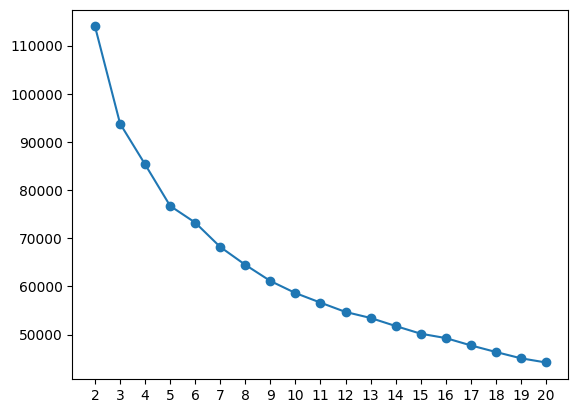

In [21]:
import matplotlib.pyplot as plt

plt.plot(ssd_results["n_clusters"],ssd_results["ssd"],marker="o")
plt.xticks(ssd_results["n_clusters"])
plt.show()

La ricerca del "gomito" della curva non è chiara, ma si è ipotizzato superiore a 5. Per essere più precisi, si è deciso di tracciare il grafico per la silouhette score in cerca di un punto di massimo.

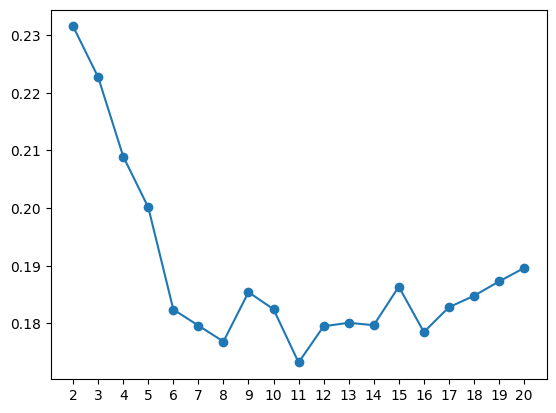

In [22]:
plt.plot(ssd_results["n_clusters"],ssd_results["sils"],marker="o")
plt.xticks(ssd_results["n_clusters"])
plt.show()

Si osservano due picchi per un numero di cluster pari a 9 e 15. Per agevolare le future analisi e ridurre il rischio di avere troppe classi da analizzare, si è scelto di addestrare l'algoritmo K-Means per un numero di cluster uguale a 9.

In [23]:
model=KMeans(n_clusters=9, init="k-means++",random_state=42)
model.fit(X)

KMeans(n_clusters=9, random_state=42)

Da questo modello è stato ottenuto un primo file CSV chiamato *cluistered_customers.csv*, che associa a ogni identificativo il cluster di appartenenza individuato dal modello.

In [24]:
pd.DataFrame({
    "CUST_ID":customers_col,
    "CLUSTER":model.labels_
}).to_csv("clustered_customers.csv",index=False)

Analogamente, nel file CSV *centroids.csv* sono stati salvati i centri dei cluster del modello, partendo dal presupposto che essi rappresentino i clienti medi di ciascun segmento.

In [25]:
pd.DataFrame(model.cluster_centers_,columns=df_power.columns).to_csv("centroids.csv",index_label="CLUSTER")

## Analisi del modello

Per l'analisi del modello ottenuto ci siamo focalizzati sulla composizione della clientela e sul comportamento medio di ogni cluster.

Per farlo, abbiamo importato i dati dai file CSV ottenuti nella sezione precedente e abbiamo definito un dizionario per assegnare a ogni cluster un colore identificativo nei grafici.

In [26]:
df_clustered = pd.read_csv('clustered_customers.csv')
df_centroids = pd.read_csv('centroids.csv')

color_map_clusters={
    0:"#33A8C7",
    1:"#52E3E1",
    2:"#A0E426",
    3:"#FDF148",
    4:"#FFAB00",
    5:"#F77976",
    6:"#F050AE",
    7:"#D883FF",
    8:"#9336FD"
}

Per visualizzare la composizione del cluster si è ricorso a un grafico a torta, da cui emerge una distribuzione equilibrata della clientela nei cluster. In particolare, il cluster più numeroso è il numero 1, mentre il meno popolato è il numero 8.

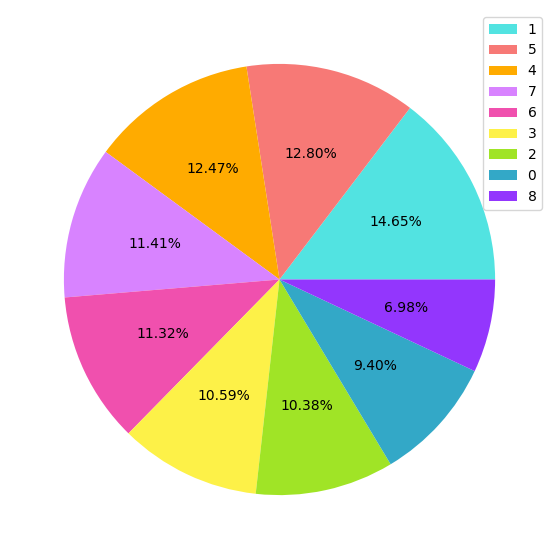

In [27]:
cluster_counts = df_clustered['CLUSTER'].value_counts()

plt.figure(figsize=(8,7))
plt.pie(cluster_counts, colors=[color_map_clusters[i] for i in cluster_counts.index], autopct='%1.2f%%')
plt.legend(labels=cluster_counts.index)
plt.show()

Per quanto riguarda il comportamento medio, è stato disegnato un grafico a coordinate parallele usando come dati i centroidi di ogni cluster, presupponendo infatti che essi rappresentino il cliente medio associato a ogni gruppo.

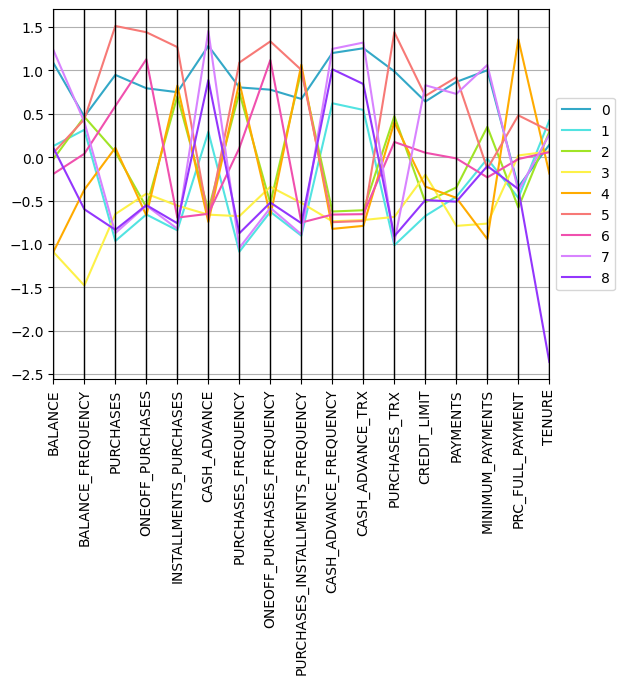

In [28]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df_centroids,"CLUSTER", color=[color_map_clusters[i] for i in df_centroids["CLUSTER"]])
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Procedendo da sinistra a destra nella lettura del grafico, emerge quanto segue:
- Dal punto di vista del saldo sul conto (BALANCE), i cluster si dividono in fascia alta (gruppi 0 e 7), fascia media (gruppi 1, 2, 5, 6, 8) e fascia bassa (gruppi 3 e 4);
- Il gruppo 3 è quello che aggiorna il saldo con minore frequenza (BALANCE_FREQUENCY) rispetto agli altri gruppi;
- Il gruppo 5 è quello con il maggiore numero di acquisti dal conto (PURCHASES), mentre il minore numero è dei gruppi 1, 3, 7 e 8;
- I gruppi 0, 5 e 6 spendono di più negli acquisti in un'unica soluzione (ONEOFF_PURCHASES) rispetto agli altri gruppi;
- I gruppi 0, 2, 4 e 5 spendono di più negli acquisti a rate (INSTALLMENTS_PURCHASES) rispetto agli altri gruppi;
- I gruppi 0, 1, 7 e 8 spendono di più negli acquisti con anticipo in contante (CASH_ADVANCE) e hanno il più alto numero di transazioni in questa modalità (CASH_ADVANCE_TRX) rispetto agli altri gruppi;
- Per quanto riguarda le frequenze di acquisto (PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY e CASH_ADVANCE_FREQUENCY) il comportamento generale riflette quello visto negli importi nelle rispettive modalità di acquisto;
- I gruppi 0 e 5 hanno il maggiore numero di acquisti (PURCHASES_TRX) rispetto agli altri gruppi;
- Per quanto riguarda gli importi dei pagamenti (PAYMENTS) possiamo distinguere anche qui una fascia altospendente (i gruppi 0, 5 e 7), una fascia mediospendente (il gruppo 6) e una fascia bassospendente (i gruppi 1, 2, 3, 4 e 8);
- Nel caso del minimo importo pagato (MINIMUM_PAYMENTS) possiamo anche qui riscontrare una fascia alta (i gruppi 0 e 7), media (i gruppi 1, 2, 5, 6 e 8) e bassa (i gruppi 3 e 4).
- Il gruppo 4 ha la più alta percentuale di pagamenti completi (PRC_FULL_PAYMENT) rispetto agli altri gruppi;
- Il gruppo 8 ha avuto una durata del servizio di carte di credito (TENURE) minore rispetto agli altri gruppi.

## Conclusione

Lo scopo di questo notebook è stato analizzare un dataset fornito da un'azienda di servizi finanziari con l'obiettivo di segmentarne la clientela a supporto della progettazione di una campagna pubblicitaria per una nuova linea di carte di credito.

Nella prima e nella seconda sezione è stato importato il dataset e, dopo un'analisi iniziale, sono stati sostituiti i valori mancanti nei dati e corretti gli errori dovuti alla loro scalatura.

Nella seconda sezione si è svolta un'analisi esplorativa. In particolare, nell'analisi univariata, è emersa una forte asimmetria nei dati e ordini di grandezza eterogenei nei valori delle colonne, mentre nell'analisi bivariata è emersa una generale scarsa correlazione tra i dati. Alla preparazione dei dati per il modello è stata dedicata la terza sezione.

Nella quarta sezione è stato addestrato il modello di clustering. Dopo aver individuato il numero di cluster (uguale a 9) in cui dividere la clientela, è stato addestrato un modello con algoritmo K-Means. Da questo modello sono stati ottenuti due file CSV, uno relativo all'assegnazione dei cluster per ogni cliente e l'altro con la descrizione del cliente medio per ogni cluster.

Nella quinta sezione, il modello così ottenuto è stato analizzato prima nella sua composizione nei dati di partenza, poi nel comportamento medio di ogni cluster. In entrambi i casi è stato tracciato un grafico che descriveva la situazione della clientela.